## 시스템 파라미터 저장

In [1]:
# Sub Pjt-1에서 진행했으므로 생략합니다

## 모델 구조 시각화 및 저장
---
https://keras.io/visualization/

사용할 모델

In [79]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Dropout, Flatten
from keras import optimizers
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28,28,1).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(256,kernel_size=(3,3),
                 activation="relu",
                 kernel_initializer='random_uniform',
                 bias_initializer='zeros',
                 input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 사용하기
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 7s 398us/step - loss: 0.4071 - accuracy: 0.8768 - val_loss: 0.2738 - val_accuracy: 0.9172
Epoch 2/5
18000/18000 [==============================] - 7s 382us/step - loss: 0.1845 - accuracy: 0.9432 - val_loss: 0.1594 - val_accuracy: 0.9524
Epoch 3/5
18000/18000 [==============================] - 7s 383us/step - loss: 0.1187 - accuracy: 0.9654 - val_loss: 0.1176 - val_accuracy: 0.9650
Epoch 4/5
18000/18000 [==============================] - 7s 383us/step - loss: 0.0810 - accuracy: 0.9758 - val_loss: 0.1052 - val_accuracy: 0.9687
Epoch 5/5
10000/10000 [==============================] - 1s 78us/step

loss_and_metrics : [0.08950704454109072, 0.9718000292778015]
True : 1, Predict : 1
True : 0, Predict : 0
True : 9, Predict : 9
True : 6, Predict : 6
True : 4, Predict : 4


메소드 1 : plot model()

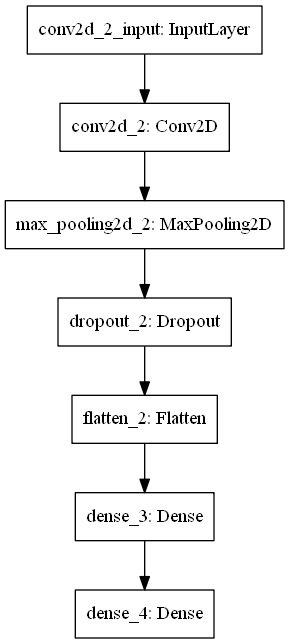

In [58]:
# 레이어의 종류와 순서만 표현
from keras.utils import plot_model
plot_model(model, to_file='model.png')
plot_model(model, to_file='model.png',show_shapes=True)
plot_model(model, to_file='model.png',expand_nested=True)

메소드 1-2. plot-model 이미지 저장

In [ ]:
from keras.utils.vis_utils import model_to_dot

In [14]:
# model to dot - 모델을 dot파일포맷으로 변경
# dot 이해 필요 - graphviz라는 visualization 소프트웨어에서 그래프 서술 언어
# dot문법을 이해할 필요는 없고, model_to_dot으로 변환만 해주면 됨

type(model_to_dot(model, show_shapes=True))

In [11]:
# model을 dot로 변경한 후, create()로 원하는 format의 그래프를 생성한다
model_to_dot(model, show_shapes=True).create(prog='dot',format='svg')

b'<?xml version="1.0" encoding="UTF-8" standalone="no"?>\r\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\r\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\r\n<!-- Generated by graphviz version 2.38.0 (20140413.2041)\r\n -->\r\n<!-- Title: G Pages: 1 -->\r\n<svg width="531pt" height="737pt"\r\n viewBox="0.00 0.00 398.00 553.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\r\n<g id="graph0" class="graph" transform="scale(1.33333 1.33333) rotate(0) translate(4 549)">\r\n<title>G</title>\r\n<polygon fill="white" stroke="none" points="-4,4 -4,-549 394,-549 394,4 -4,4"/>\r\n<!-- 1837123740296 -->\r\n<g id="node1" class="node"><title>1837123740296</title>\r\n<polygon fill="none" stroke="black" points="23,-498.5 23,-544.5 367,-544.5 367,-498.5 23,-498.5"/>\r\n<text text-anchor="middle" x="111" y="-517.8" font-family="Times New Roman,serif" font-size="14.00">conv2d_1_input: InputLayer</text>\r\n<polyline fill="none" stroke="black" points="199,-498.5 199

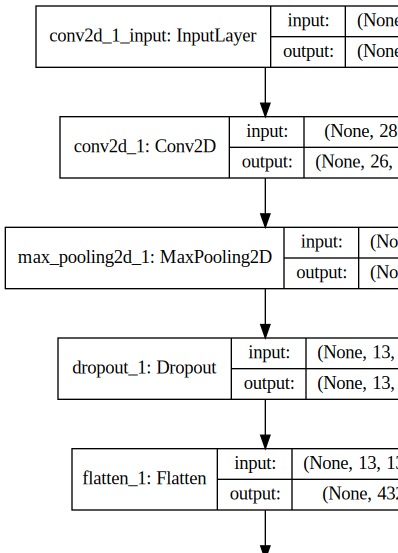

In [50]:
#모델 아키텍처 시각화
from IPython.display import SVG

# 생성된 SVG 파일을 IPython 커널의 display를 통해 시각화
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

메소드 2. model summary

In [59]:
# plot_model의 정보 위의 정보들에 추가적으로 param # 보여줌
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 2,772,170
Trainable params: 2,772,170
Non-trainable params: 0
____________________________________________

메소드 3. 모델 내부의 Func 확인

In [62]:
#model 객체의 layers에서 확인 가능
#layer activation, initializer 확인 가능
model.layers[0].activation , model.layers[0].kernel_initializer

(<function keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0.0)>,
 <keras.initializers.RandomUniform at 0x1abdc47c288>)

In [80]:
#model optimizer 확인 가능
model.optimizer

In [88]:
#optimizer 설정도 확인 가능
model.optimizer.get_config()

{'learning_rate': 0.009999999776482582,
 'momentum': 0.8999999761581421,
 'decay': 9.999999974752427e-07,
 'nesterov': True}

In [3]:
# RNN 모델 내부 구조 저장

## 모델 학습 결과 저장

방법 1. argparse 라이브러리 이용

In [ ]:
# batch_size,epoch은 argparse 이용 가능
# model.fit 시 사용되는 모든 argument(https://www.tensorflow.org/api_docs/python/tf/keras/Model) 저장 가능

방법 1. hist 객체 사용

In [67]:
# epoch별 metric 결과는 hist에서 확인 가능
hist.history

{'val_loss': [0.3938412240913936,
  0.36442891646283015,
  0.28990501230245547,
  0.2825883195939518,
  0.26718402979771294],
 'val_accuracy': [0.8878571391105652,
  0.8897857069969177,
  0.9142380952835083,
  0.9178571701049805,
  0.920452356338501],
 'loss': [0.7982787083784739,
  0.3393993072708448,
  0.2960471516582701,
  0.2641215688056416,
  0.2392258566816648],
 'accuracy': [0.80583334, 0.89827776, 0.9118889, 0.9215556, 0.9293889]}

방법 2. 모델 weight만 저장

In [92]:
#대략 10mb
model.save_weights('model-weight/model-weight.h5')

방법 3. 모델 아키텍처 + weight 저장

나중에 모델을 재구성하기 위한 모델의 구성 정보  
모델를 구성하는 각 뉴런들의 가중치(weight)  
손실함수, 최적하기 등의 학습 설정  
재학습을 할 수 있도록 마지막 학습 상태  

In [93]:
#대략 21mb
model.save('model/model.h5')